In [1]:
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 18

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
MAIN_DIR = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/'
images_df = pd.read_csv(MAIN_DIR+'images.csv')
styles_df = pd.read_csv(MAIN_DIR+'styles.csv', on_bad_lines='skip')

In [3]:
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [4]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
styles_df['filename'] = styles_df['id'].astype(str) + '.jpg'
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [6]:
image_files = os.listdir(MAIN_DIR+'images')

In [7]:
styles_df['present'] = styles_df['filename'].apply(lambda x: x in image_files)
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,present
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,True
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,True
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,True
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,True
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,True


In [8]:
styles_df['present'].value_counts()

present
True     44419
False        5
Name: count, dtype: int64

In [9]:
styles_df = styles_df[styles_df['present']].reset_index(drop=True)

In [10]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,present
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,True
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,True
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,True
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,True
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,True


In [11]:
styles_df.shape

(44419, 12)

In [12]:
styles = styles_df.sample(10000,random_state = 30).reset_index(drop=True)
styles.shape

(10000, 12)

In [13]:
from PIL import Image

image_path = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/14782.jpg'
image_sample = Image.open(image_path)
'''plt.imshow(image_sample)
plt.axis('off')
plt.show()'''

width, height = image_sample.size
number_of_pixel = width*height

number_of_channel = len(image_sample.getbands())

print(f"Resmin boyutu: {width}x{height} piksel")
print(f"Toplam piksel sayısı: {number_of_pixel}")
print(f"Kanal sayısı: {number_of_channel}")


Resmin boyutu: 1800x2400 piksel
Toplam piksel sayısı: 4320000
Kanal sayısı: 3


In [14]:
IMG_SIZE = (224,224)
datagen = ImageDataGenerator(rescale=1/255.)
generator = datagen.flow_from_dataframe(dataframe=styles,
                                        directory=MAIN_DIR+'images',
                                        target_size=IMG_SIZE,
                                        x_col='filename',
                                        class_mode=None,
                                        batch_size=32,
                                        shuffle=False)

Found 10000 validated image filenames.


In [15]:
base_model = VGG16(include_top=False, input_shape=IMG_SIZE+(3,))
base_model.trainable = False 

input_layer = Input(shape=IMG_SIZE+(3,))
x = base_model(input_layer)
output = GlobalAveragePooling2D()(x)

embeddings = Model(input_layer, output)
embeddings.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [16]:
from keras.models import load_model

embeddings.save('trained_model.h5')
loaded_model = load_model('trained_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
X = loaded_model.predict(generator, verbose=1)

313/313 [==============================] - 290s 904ms/step


In [18]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X)

In [19]:
X_pca.shape

(10000, 2)

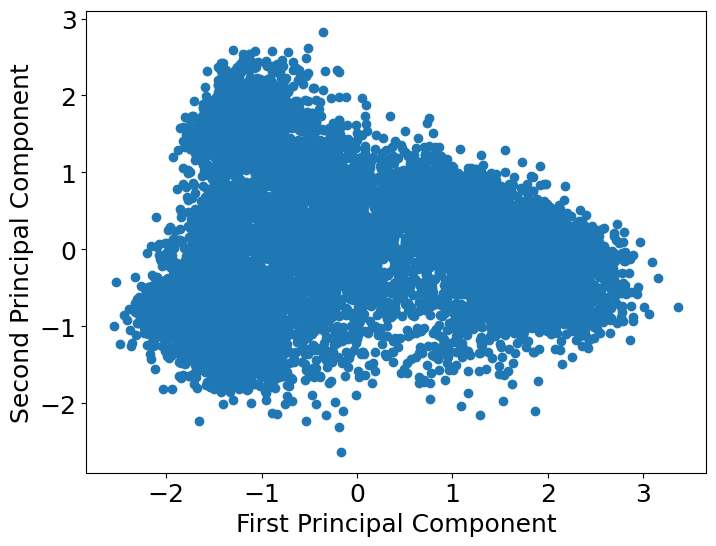

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()


In [21]:
styles[['pc1','pc2']] = X_pca

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

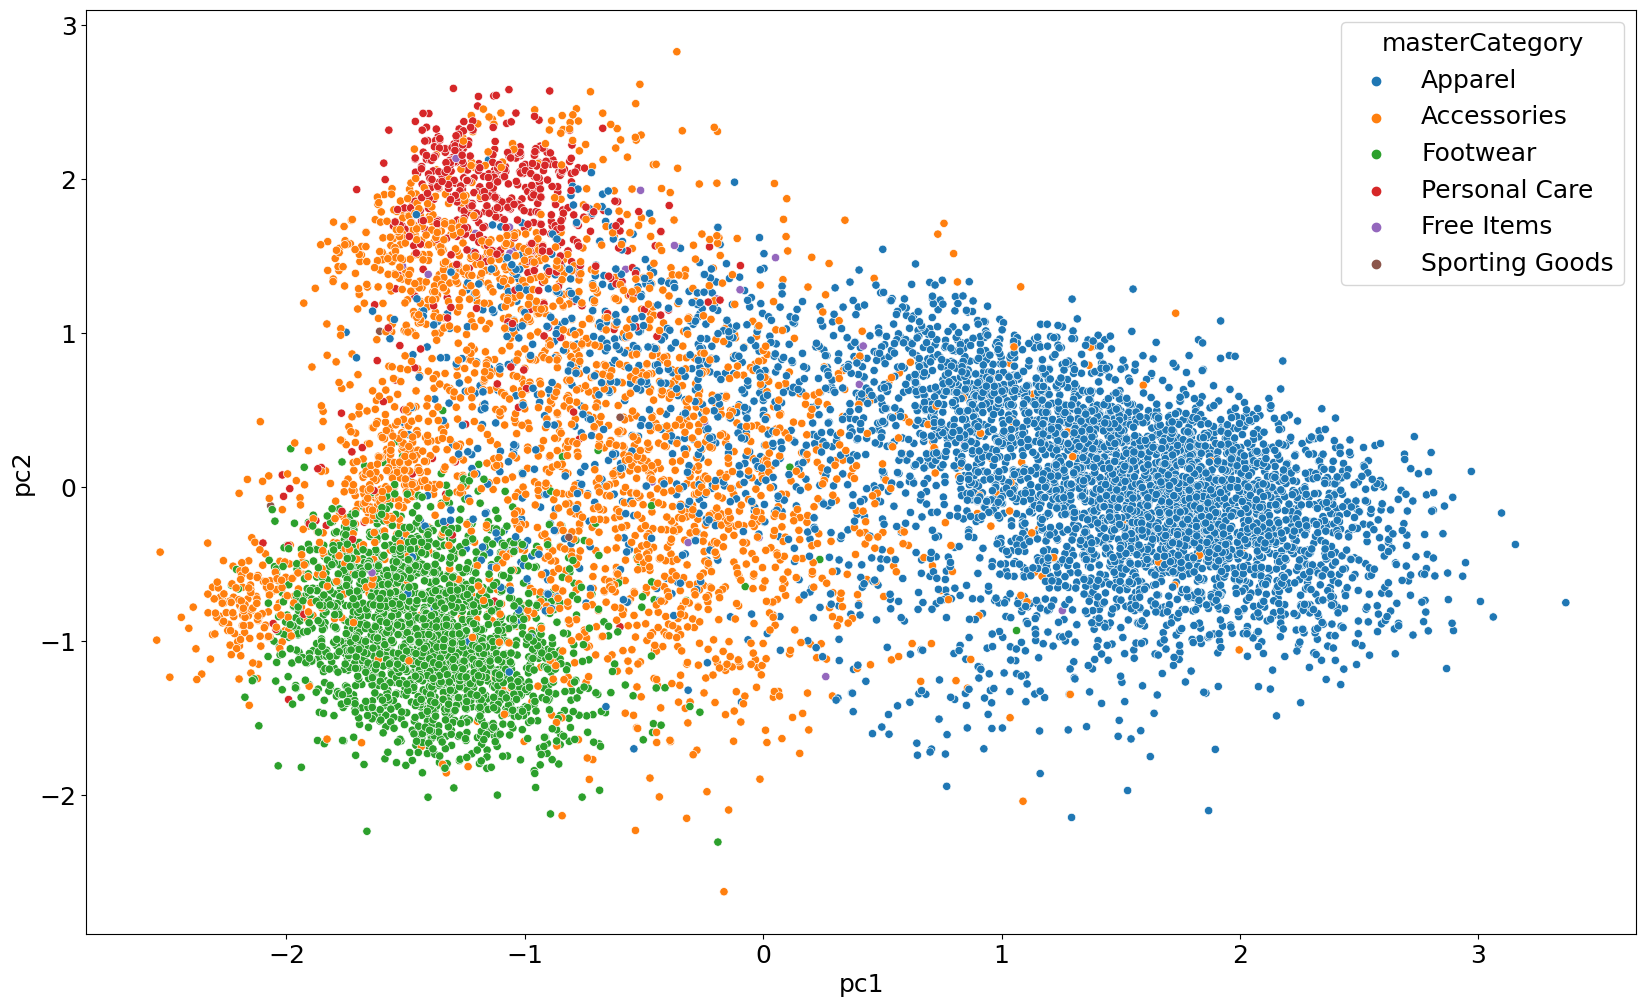

In [22]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='pc1',y='pc2', data=styles, hue='masterCategory')
plt.show()

In [23]:
def read_img(image_path):
    path = MAIN_DIR + 'images/'
    image = load_img(os.path.join(path,image_path),target_size=(224,224,3))
    image = img_to_array(image)
    image = image/255.
    return image

In [24]:
import random
from sklearn.neighbors import KNeighborsClassifier
y = styles['id']

In [25]:
nn = KNeighborsClassifier(n_neighbors=6)
nn.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier(n_neighbors=6)

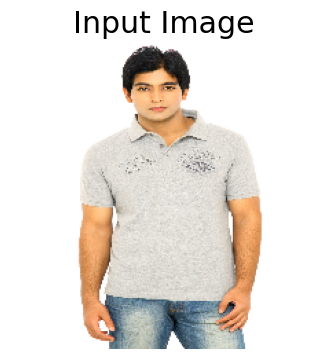

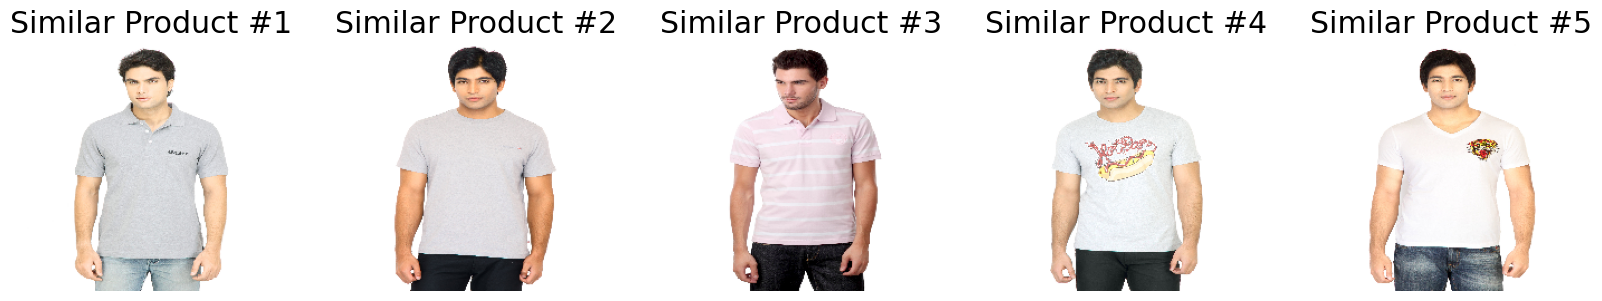

In [26]:
for _ in range(1):
    i = random.randint(0,len(styles))
    img1 = read_img(styles.loc[i,'filename'])
    dist, index = nn.kneighbors(X=X[i,:].reshape(1,-1))
    plt.figure(figsize = (4 , 4))
    plt.imshow(img1)
    plt.title("Input Image")
    plt.axis('off')

    plt.figure(figsize = (20 , 20))
    for i in range(1,6):
        plt.subplot(1 , 5, i)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = read_img(styles.loc[index[0][i],'filename'])
        plt.imshow(image)
        plt.title(f'Similar Product #{i}')
        plt.axis('off')

In [27]:
styles.tail()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,present,pc1,pc2
9995,8940,Men,Apparel,Topwear,Shirts,Red,Fall,2011.0,Casual,Indigo Nation Men Reversible Bling Red Shirts,8940.jpg,True,2.946565,-0.491584
9996,38994,Boys,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Gini and Jony Boys Jeans Blue Jeans,38994.jpg,True,-0.248070,1.266104
9997,56282,Women,Apparel,Innerwear,Bra,Black,Summer,2017.0,Casual,Biara Black Everyday Support Bra,56282.jpg,True,1.293864,-2.146958
9998,25161,Women,Accessories,Bags,Handbags,Black,Winter,2015.0,Casual,Lino Perros Women Leatherette Black Handbag,25161.jpg,True,-0.232141,0.053862
9999,4046,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011.0,Sports,ADIDAS Men's Allegra 4M White Navy Blue Black ...,4046.jpg,True,-1.274389,-0.953826


In [28]:
len(styles['id'].unique())

10000

In [29]:
product_list = styles['id'].unique()

In [30]:
product_list[0]

48441

In [31]:
input_image = styles.loc[styles.index[styles['id'] == 10].tolist(),'filename']

In [32]:
input_image

Series([], Name: filename, dtype: object)

In [33]:
styles[styles['id'] == product_list[0]]['filename']

0    48441.jpg
Name: filename, dtype: object

In [34]:
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,present,pc1,pc2
0,48441,Men,Apparel,Topwear,Tshirts,White,Summer,2012.0,Casual,French Connection Men White Printed T-shirt,48441.jpg,True,0.760329,0.649948
1,40051,Men,Apparel,Topwear,Jackets,Navy Blue,Fall,2013.0,Sports,ADIDAS Men Navy Messi Track Jacket,40051.jpg,True,1.349681,-0.366397
2,12327,Men,Apparel,Topwear,Shirts,Pink,Winter,2011.0,Formal,Genesis Pink Striped Formal Shirt,12327.jpg,True,1.815399,-0.065848
3,41527,Men,Accessories,Bags,Messenger Bag,Brown,Summer,2012.0,Casual,Basics Men Brown Messenger Bag,41527.jpg,True,-0.336281,-0.610129
4,17420,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Casio Enticer Men Black Dial Analogue Watch A479,17420.jpg,True,-0.213904,-0.173725


In [35]:
image_dict = {}
for j in product_list:
    i = styles.index[styles['id'] == j]
    #input_image = styles.loc[styles.index[styles['id'] == j].tolist(),'filename'].iloc[0]
    dist, index = nn.kneighbors(X=X[i,:].reshape(1,-1))
    recommended_images = [styles.loc[index[0][k],'filename'] for k in range(1,6)]
    image_dict[j] = recommended_images

In [36]:
len(image_dict)

10000

In [37]:
product_list[0],image_dict[product_list[0]]

(48441, ['48443.jpg', '16191.jpg', '16213.jpg', '22792.jpg', '48424.jpg'])

In [38]:
# artık alınan ürün ve önerilen 5 ürün görülüyor. Bunlara bizim atadığımız alındı-alınmadı özellik çıkartmasını yapabilir miyiz. düşün.
# öneri sistemi değerlendirmesi için kullanılması hedeflenebilir mi düşün.